## Multi parallel input and multi-step output

In [2]:
# importing neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import concatenate
import tensorflow as tf

In [437]:
# loading  a city data
path_csv = r'C:\Users\rocks\Desktop\nasscom hackathon\warangal.csv'
city= pd.read_csv(path_csv, index_col='Dates', parse_dates=True)
city.head()

,S02,NOX,PM10,NH3,AQI
Dates,,,,,
Jan-16,7.0,26.0,76,22,76
Feb-16,7.0,19.0,72,21,72
Mar-16,7.1,21.8,63,24,63
Apr-16,7.0,20.0,73,21,73
May-16,8.0,19.0,84,21,84


In [439]:
# train split
train = city[:72]
train = train.to_numpy()
train.shape

(72, 5)

In [440]:
# normalizing the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)

In [441]:
# formatting the data for time series
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix: out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
    

In [442]:
n_steps_in, n_steps_out = 12, 12 
X, y = split_sequences(scaled_train, n_steps_in, n_steps_out)

In [443]:
X[0], y[0]

(array([[0.03960396, 0.18918919, 0.69444444, 0.03921569, 0.65517241],
        [0.03960396, 0.        , 0.63888889, 0.01960784, 0.5862069 ],
        [0.04290429, 0.07567568, 0.51388889, 0.07843137, 0.43103448],
        [0.03960396, 0.02702703, 0.65277778, 0.01960784, 0.60344828],
        [0.07260726, 0.        , 0.80555556, 0.01960784, 0.79310345],
        [0.03960396, 0.08108108, 0.58333333, 0.15686275, 0.51724138],
        [0.03960396, 0.02702703, 0.41666667, 0.07843137, 0.43103448],
        [0.03960396, 0.24324324, 0.13888889, 0.03921569, 0.        ],
        [0.03960396, 0.02702703, 0.36111111, 0.        , 0.24137931],
        [0.03960396, 0.08108108, 0.48611111, 0.03921569, 0.39655172],
        [0.00660066, 0.08108108, 0.79166667, 0.01960784, 0.77586207],
        [0.07260726, 0.2972973 , 0.80555556, 0.05882353, 0.79310345]]),
 array([[0.07260726, 0.16216216, 0.69444444, 0.03921569, 0.65517241],
        [0.07260726, 0.21621622, 0.73611111, 0.09803922, 0.68965517],
        [0.0726072

### Deep model

In [444]:
#define model
n_features =1
n_steps_in =12
n_steps_out=12
visible1 = Input(shape=(n_steps_in, n_features))
visible2 = Input(shape=(n_steps_in, n_features))
visible3 = Input(shape=(n_steps_in, n_features))
visible4 = Input(shape=(n_steps_in, n_features))
visible5 = Input(shape=(n_steps_in, n_features))

cnn1 = Conv1D(filters= 32, kernel_size=3, activation='relu')(visible1)
cnn2 = Conv1D(filters= 32, kernel_size=3, activation='relu')(visible2)
cnn3 = Conv1D(filters= 32, kernel_size=3, activation='relu')(visible3)
cnn4 = Conv1D(filters= 32, kernel_size=3, activation='relu')(visible4)
cnn5 = Conv1D(filters= 32, kernel_size=3, activation='relu')(visible5)

mid = concatenate([cnn1, cnn2, cnn3, cnn4, cnn5])
mid = Conv1D(filters=16, kernel_size=3, activation='relu')(mid)
mid = Conv1D(filters=16, kernel_size=3, activation='relu')(mid)

#define output 1
output1 = Conv1D(filters=16, kernel_size=2, activation='relu')(mid)
output1 = Conv1D(filters = 16, kernel_size=2, activation='relu')(output1)
# output1 = MaxPooling1D(pool_size=2)(output1)
output1 = Flatten()(output1)
output1 = Dense(n_steps_out)(output1)

#define output 2
output2 = Conv1D(filters=16, kernel_size=2, activation='relu')(mid)
output2 = Conv1D(filters = 16, kernel_size=2, activation='relu')(output2)
# output2 = MaxPooling1D(pool_size=2)(output2)
output2 = Flatten()(output2)
output2 = Dense(n_steps_out)(output2)

#define output 3
output3 = Conv1D(filters=16, kernel_size=2, activation='relu')(mid)
output3 = Conv1D(filters = 16, kernel_size=2, activation='relu')(output3)
# output3 = MaxPooling1D(pool_size=2)(output3)
output3 = Flatten()(output3)
output3 = Dense(n_steps_out)(output3)

#define output 4
output4 = Conv1D(filters=16, kernel_size=2, activation='relu')(mid)
output4 = Conv1D(filters = 16, kernel_size=2, activation='relu')(output4)
# output4 = MaxPooling1D(pool_size=2)(output4)
output4 = Flatten()(output4)
output4 = Dense(n_steps_out)(output4)

#define output 5
output5 = Conv1D(filters=16, kernel_size=2, activation='relu')(mid)
output5 = Conv1D(filters = 16, kernel_size=2, activation='relu')(output5)
# output5 = MaxPooling1D(pool_size=2)(output5)
output5 = Flatten()(output5)
output5 = Dense(n_steps_out)(output5)

model = Model(inputs = [visible1, visible2, visible3, visible4, visible5], outputs = [output1, output2, output3, output4, output5])
model.compile(optimizer='adam', loss= 'mse')

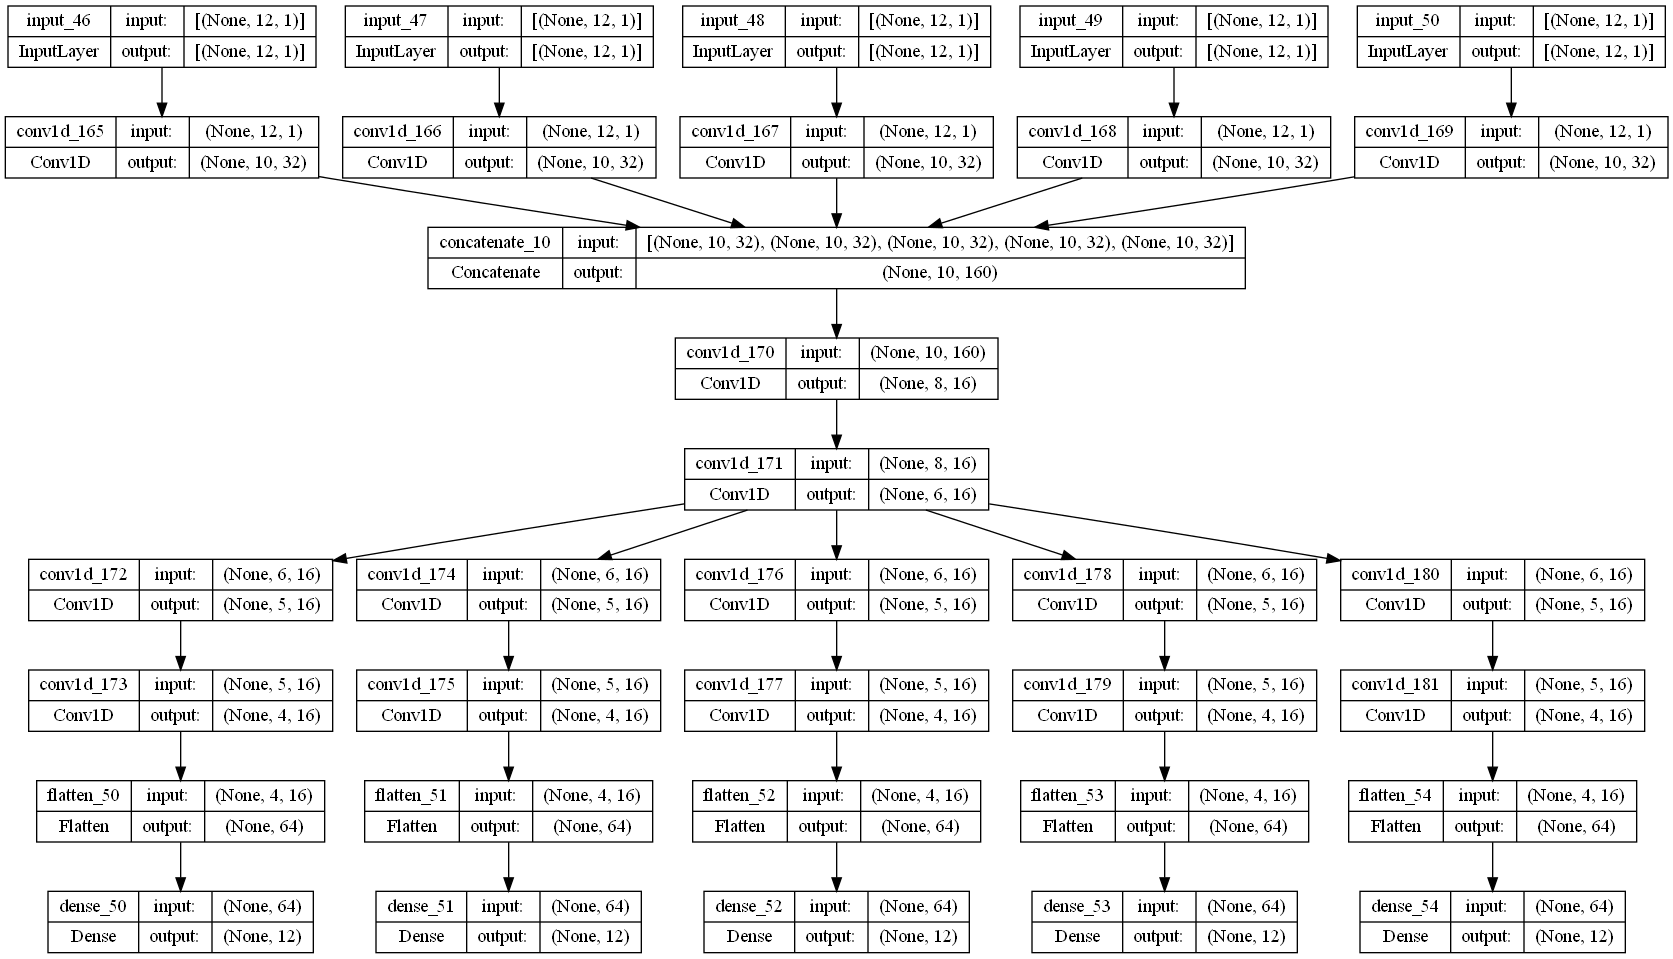

In [445]:
tf.keras.utils.plot_model(model, to_file='model_arc.png', show_shapes=True)

In [446]:
X.shape

(49, 12, 5)

In [447]:
X1 = X[:, :, 0].reshape((X.shape[0], X.shape[1], n_features))
X2 = X[:, :, 1].reshape((X.shape[0], X.shape[1], n_features))
X3 = X[:, :, 2].reshape((X.shape[0], X.shape[1], n_features))
X4 = X[:, :, 3].reshape((X.shape[0], X.shape[1], n_features))
X5 = X[:, :, 4].reshape((X.shape[0], X.shape[1], n_features))

In [448]:
y1 = y[:,:, 0].reshape((y.shape[0], y.shape[1], n_features))
y2 = y[:,:, 1].reshape((y.shape[0], y.shape[1], n_features))
y3 = y[:,:, 2].reshape((y.shape[0], y.shape[1], n_features))
y4 = y[:,:, 3].reshape((y.shape[0], y.shape[1], n_features))
y5 = y[:,:, 4].reshape((y.shape[0], y.shape[1], n_features))

In [449]:
model.fit([X1, X2, X3, X4, X5], [y1, y2, y3, y4, y5], epochs=1500)

Epoch 1/1500
2/2 [==============================] - 4s 9ms/step - loss: 1.9030 - dense_50_loss: 0.0262 - dense_51_loss: 0.3878 - dense_52_loss: 0.5335 - dense_53_loss: 0.4369 - dense_54_loss: 0.5185
Epoch 2/1500
2/2 [==============================] - 0s 11ms/step - loss: 1.8696 - dense_50_loss: 0.0253 - dense_51_loss: 0.3798 - dense_52_loss: 0.5274 - dense_53_loss: 0.4289 - dense_54_loss: 0.5081
Epoch 3/1500
2/2 [==============================] - 0s 14ms/step - loss: 1.8295 - dense_50_loss: 0.0247 - dense_51_loss: 0.3650 - dense_52_loss: 0.5203 - dense_53_loss: 0.4227 - dense_54_loss: 0.4968
Epoch 4/1500
2/2 [==============================] - 0s 12ms/step - loss: 1.7708 - dense_50_loss: 0.0244 - dense_51_loss: 0.3428 - dense_52_loss: 0.5097 - dense_53_loss: 0.4124 - dense_54_loss: 0.4814
Epoch 5/1500
2/2 [==============================] - 0s 10ms/step - loss: 1.6914 - dense_50_loss: 0.0244 - dense_51_loss: 0.3134 - dense_52_loss: 0.4956 - dense_53_loss: 0.3965 - dense_54_loss: 0.4614
E

In [466]:
model.save('models/multi_multi_CNN')

INFO:tensorflow:Assets written to: models/multi_multi_CNN\assets


INFO:tensorflow:Assets written to: models/multi_multi_CNN\assets


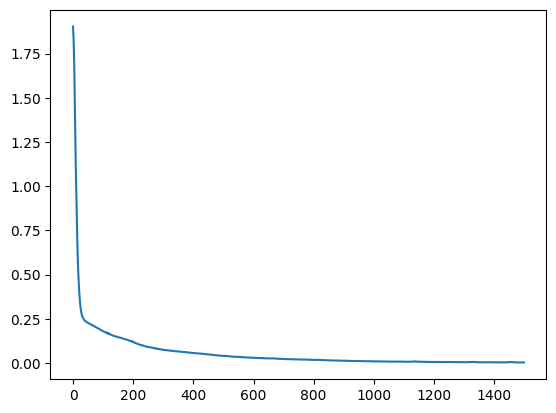

In [451]:
#training loss
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [452]:
loss_per_epoch[-1]

0.003106841119006276

In [453]:
test = city[72:]
scaled_test = scaler.transform(test)

c:\Users\rocks\anaconda3\envs\test\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [454]:
last_train_batch= scaled_train[-12:, :]
last_train_batch = last_train_batch.reshape((1, n_steps_in, 5))
last_train_batch.shape

(1, 12, 5)

In [455]:
x1 = last_train_batch[:, :, 0].reshape((1, n_steps_in, n_features))
x2 = last_train_batch[:, :, 1].reshape((1, n_steps_in, n_features))
x3 = last_train_batch[:, :, 2].reshape((1, n_steps_in, n_features))
x4 = last_train_batch[:, :, 3].reshape((1, n_steps_in, n_features))
x5 = last_train_batch[:, :, 4].reshape((1, n_steps_in, n_features))

In [456]:
yhat = model.predict([x1, x2, x3, x4, x5])
yhat = array(yhat)
yhat = yhat.reshape(5,12)
yha = yhat.T
yha.shape

1/1 [==============================] - 0s 258ms/step


(12, 5)

In [457]:
yha = scaler.inverse_transform(yha)
yha

array([[ 2.3257005, 31.582638 , 68.04132  , 29.211359 , 57.454937 ],
       [13.333544 , 50.550167 , 80.43788  , 53.18733  , 82.71507  ],
       [ 1.4446609, 48.287617 , 97.298904 , 51.729603 , 88.717186 ],
       [ 5.379179 , 45.73003  , 87.989105 , 55.808815 , 83.85734  ],
       [13.425859 , 46.92273  , 73.86292  , 57.328606 , 59.940178 ],
       [ 4.2917953, 34.603603 , 73.06702  , 60.263775 , 71.36846  ],
       [10.140032 , 38.451614 , 80.45569  , 44.27793  , 77.09984  ],
       [11.98522  , 33.320023 , 70.66254  , 46.58044  , 67.95837  ],
       [ 8.859544 , 34.942665 , 69.26471  , 50.482864 , 76.929955 ],
       [ 4.7406397, 34.118114 , 75.44956  , 56.270638 , 66.459694 ],
       [ 3.8874898, 42.519787 , 83.44284  , 49.763447 , 81.07709  ],
       [12.629767 , 39.006336 , 80.62484  , 58.63951  , 83.24476  ]],
      dtype=float32)

In [458]:
yha_aqi = yha[:, 4]

In [459]:
yha_aqi

array([57.454937, 82.71507 , 88.717186, 83.85734 , 59.940178, 71.36846 ,
       77.09984 , 67.95837 , 76.929955, 66.459694, 81.07709 , 83.24476 ],
      dtype=float32)

In [461]:
test= test.drop(['S02', 'NOX', 'PM10', 'NH3'], axis=1)

In [462]:
test['Predicted Aqi'] = yha_aqi

<AxesSubplot: xlabel='Dates'>

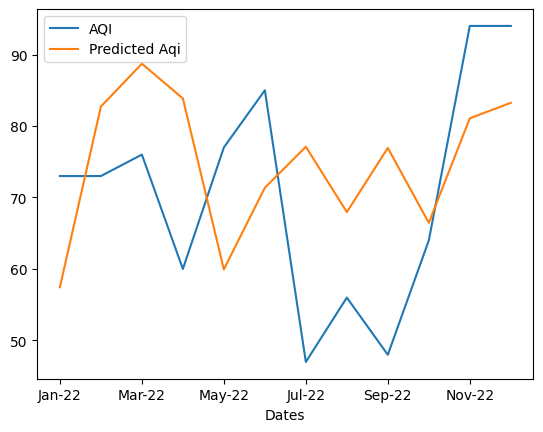

In [464]:
test.plot()

In [465]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['AQI'], test['Predicted Aqi']))
rmse

17.6031706960518

In [435]:
test.to_csv('nizamabad_prediction.csv')